In [1]:
##setting work directory for R
mydir<- getwd()
setwd(mydir)

In [2]:
##setting work directory for bash
%use bash
mydir=`pwd`
cd $mydir

bash: fg: %use: no such job


In [5]:
##loading R libraries
.libPaths(c("/anvil/projects/x-tra220018/2022/Rlibs", .libPaths()))
library(BiocParallel)
library(dplyr)
library(EnsDb.Hsapiens.v86)
library(GenomicAlignments)
library(GenomicRanges) 
library(Gviz)
library(parallel)
library(Rsamtools)
library(ShortRead)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ensembldb

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min


Loading required package: GenomicRanges

Loading req

In [7]:
#checking quality of single-end data
#%use bash
#module load fastqc/0.11.9
#data_path=/home/x-tsuzuki/bigcare/myproject/raw
#fastqc -t 20 $data_path/*.fastq.gz -o ./data/fastqc/raw/

bash: fg: %use: no such job
Started analysis of PDX4_CR1_S10_R1_001.fastq.gz
Started analysis of PDX4_CR2_S11_R1_001.fastq.gz
Started analysis of PDX4_CR3_S12_R1_001.fastq.gz
Started analysis of PDX4_SE1_S7_R1_001.fastq.gz
Started analysis of PDX4_SE2_S8_R1_001.fastq.gz
Started analysis of PDX4_SE3_S9_R1_001.fastq.gz
Approx 5% complete for PDX4_CR1_S10_R1_001.fastq.gz
Approx 5% complete for PDX4_CR2_S11_R1_001.fastq.gz
Approx 5% complete for PDX4_CR3_S12_R1_001.fastq.gz
Approx 5% complete for PDX4_SE1_S7_R1_001.fastq.gz
Approx 5% complete for PDX4_SE2_S8_R1_001.fastq.gz
Approx 5% complete for PDX4_SE3_S9_R1_001.fastq.gz
Approx 10% complete for PDX4_CR1_S10_R1_001.fastq.gz
Approx 10% complete for PDX4_SE1_S7_R1_001.fastq.gz
Approx 10% complete for PDX4_CR2_S11_R1_001.fastq.gz
Approx 10% complete for PDX4_CR3_S12_R1_001.fastq.gz
Approx 10% complete for PDX4_SE2_S8_R1_001.fastq.gz
Approx 10% complete for PDX4_SE3_S9_R1_001.fastq.gz
Approx 15% complete for PDX4_SE1_S7_R1_001.fastq.gz
Appro

In [1]:
##aligning single-end data to genome
# PDX4_SE1_S7_R1_001
module load star/2.7.10a
data_path=./data/trim
out_path=./data/STAR/single/Trimmomatic
STAR --runMode alignReads \
--genomeDir /home/x-tsuzuki/bigcare/ref_files/genomeassembly \
--sjdbGTFfile /anvil/projects/x-tra220018/ref_files/Homo_sapiens.GRCh38.105.gtf \
--outFilterType BySJout \
--outSAMattributes NH HI AS NM MD MC \
--outFilterMultimapNmax 20 \
--alignIntronMin 20 \
--alignIntronMax 1000000 \
--alignSJoverhangMin 8 \
--alignSJDBoverhangMin 1 \
--sjdbScore 1 \
--readFilesCommand zcat \
--runThreadN 20 \
--outSAMtype BAM SortedByCoordinate \
--quantMode TranscriptomeSAM GeneCounts \
--outSAMheaderHD @HD VN:1.4 SO:coordinate \
--outFileNamePrefix $out_path/PDX4_SE1_S \
--readFilesIn $data_path/PDX4_SE1_S7_R1_001.fastq.gz

	STAR --runMode alignReads --genomeDir /home/x-tsuzuki/bigcare/ref_files/genomeassembly --sjdbGTFfile /anvil/projects/x-tra220018/ref_files/Homo_sapiens.GRCh38.105.gtf --outFilterType BySJout --outSAMattributes NH HI AS NM MD MC --outFilterMultimapNmax 20 --alignIntronMin 20 --alignIntronMax 1000000 --alignSJoverhangMin 8 --alignSJDBoverhangMin 1 --sjdbScore 1 --readFilesCommand zcat --runThreadN 20 --outSAMtype BAM SortedByCoordinate --quantMode TranscriptomeSAM GeneCounts --outSAMheaderHD @HD VN:1.4 SO:coordinate --outFileNamePrefix ./data/STAR/single/Trimmomatic/PDX4_SE1_S --readFilesIn ./data/trim/PDX4_SE1_S7_R1_001.fastq.gz
	STAR version: 2.7.10a   compiled: 2022-01-14T18:50:00-05:00 :/home/dobin/data/STAR/STARcode/STAR.master/source
Apr 24 19:21:45 ..... started STAR run
Apr 24 19:21:45 ..... loading genome
Apr 24 19:21:58 ..... processing annotations GTF
Apr 24 19:22:18 ..... inserting junctions into the genome indices
Apr 24 19:23:21 ..... started mapping
Apr 24 19:24:21 ..... 

In [2]:
module load star/2.7.10a
data_path=./data/trim
out_path=./data/STAR/single/Trimmomatic
STAR --runMode alignReads \
--genomeDir /home/x-tsuzuki/bigcare/ref_files/genomeassembly \
--sjdbGTFfile /anvil/projects/x-tra220018/ref_files/Homo_sapiens.GRCh38.105.gtf \
--outFilterType BySJout \
--outSAMattributes NH HI AS NM MD MC \
--outFilterMultimapNmax 20 \
--alignIntronMin 20 \
--alignIntronMax 1000000 \
--alignSJoverhangMin 8 \
--alignSJDBoverhangMin 1 \
--sjdbScore 1 \
--readFilesCommand zcat \
--runThreadN 20 \
--outSAMtype BAM SortedByCoordinate \
--quantMode TranscriptomeSAM GeneCounts \
--outSAMheaderHD @HD VN:1.4 SO:coordinate \
--outFileNamePrefix $out_path/PDX4_SE2_S \
--readFilesIn $data_path/PDX4_SE2_S8_R1_001.fastq.gz

	STAR --runMode alignReads --genomeDir /home/x-tsuzuki/bigcare/ref_files/genomeassembly --sjdbGTFfile /anvil/projects/x-tra220018/ref_files/Homo_sapiens.GRCh38.105.gtf --outFilterType BySJout --outSAMattributes NH HI AS NM MD MC --outFilterMultimapNmax 20 --alignIntronMin 20 --alignIntronMax 1000000 --alignSJoverhangMin 8 --alignSJDBoverhangMin 1 --sjdbScore 1 --readFilesCommand zcat --runThreadN 20 --outSAMtype BAM SortedByCoordinate --quantMode TranscriptomeSAM GeneCounts --outSAMheaderHD @HD VN:1.4 SO:coordinate --outFileNamePrefix ./data/STAR/single/Trimmomatic/PDX4_SE2_S --readFilesIn ./data/trim/PDX4_SE2_S8_R1_001.fastq.gz
	STAR version: 2.7.10a   compiled: 2022-01-14T18:50:00-05:00 :/home/dobin/data/STAR/STARcode/STAR.master/source
Apr 24 19:24:28 ..... started STAR run
Apr 24 19:24:28 ..... loading genome
Apr 24 19:24:41 ..... processing annotations GTF
Apr 24 19:24:58 ..... inserting junctions into the genome indices
Apr 24 19:26:03 ..... started mapping
Apr 24 19:26:56 ..... 

In [3]:
# PDX4_SE3_S9_R1_001
module load star/2.7.10a
data_path=./data/trim
out_path=./data/STAR/single/Trimmomatic
STAR --runMode alignReads \
--genomeDir /home/x-tsuzuki/bigcare/ref_files/genomeassembly \
--sjdbGTFfile /anvil/projects/x-tra220018/ref_files/Homo_sapiens.GRCh38.105.gtf \
--outFilterType BySJout \
--outSAMattributes NH HI AS NM MD MC \
--outFilterMultimapNmax 20 \
--alignIntronMin 20 \
--alignIntronMax 1000000 \
--alignSJoverhangMin 8 \
--alignSJDBoverhangMin 1 \
--sjdbScore 1 \
--readFilesCommand zcat \
--runThreadN 20 \
--outSAMtype BAM SortedByCoordinate \
--quantMode TranscriptomeSAM GeneCounts \
--outSAMheaderHD @HD VN:1.4 SO:coordinate \
--outFileNamePrefix $out_path/PDX4_SE3_S \
--readFilesIn $data_path/PDX4_SE3_S9_R1_001.fastq.gz

	STAR --runMode alignReads --genomeDir /home/x-tsuzuki/bigcare/ref_files/genomeassembly --sjdbGTFfile /anvil/projects/x-tra220018/ref_files/Homo_sapiens.GRCh38.105.gtf --outFilterType BySJout --outSAMattributes NH HI AS NM MD MC --outFilterMultimapNmax 20 --alignIntronMin 20 --alignIntronMax 1000000 --alignSJoverhangMin 8 --alignSJDBoverhangMin 1 --sjdbScore 1 --readFilesCommand zcat --runThreadN 20 --outSAMtype BAM SortedByCoordinate --quantMode TranscriptomeSAM GeneCounts --outSAMheaderHD @HD VN:1.4 SO:coordinate --outFileNamePrefix ./data/STAR/single/Trimmomatic/PDX4_SE3_S --readFilesIn ./data/trim/PDX4_SE3_S9_R1_001.fastq.gz
	STAR version: 2.7.10a   compiled: 2022-01-14T18:50:00-05:00 :/home/dobin/data/STAR/STARcode/STAR.master/source
Apr 24 19:27:07 ..... started STAR run
Apr 24 19:27:07 ..... loading genome
Apr 24 19:27:21 ..... processing annotations GTF
Apr 24 19:27:36 ..... inserting junctions into the genome indices
Apr 24 19:28:41 ..... started mapping
Apr 24 19:29:37 ..... 

In [4]:
# PDX4_CR1_S10_R1_001
module load star/2.7.10a
data_path=./data/trim
out_path=./data/STAR/single/Trimmomatic
STAR --runMode alignReads \
--genomeDir /home/x-tsuzuki/bigcare/ref_files/genomeassembly \
--sjdbGTFfile /anvil/projects/x-tra220018/ref_files/Homo_sapiens.GRCh38.105.gtf \
--outFilterType BySJout \
--outSAMattributes NH HI AS NM MD MC \
--outFilterMultimapNmax 20 \
--alignIntronMin 20 \
--alignIntronMax 1000000 \
--alignSJoverhangMin 8 \
--alignSJDBoverhangMin 1 \
--sjdbScore 1 \
--readFilesCommand zcat \
--runThreadN 20 \
--outSAMtype BAM SortedByCoordinate \
--quantMode TranscriptomeSAM GeneCounts \
--outSAMheaderHD @HD VN:1.4 SO:coordinate \
--outFileNamePrefix $out_path/PDX4_CR1_S \
--readFilesIn $data_path/PDX4_CR1_S10_R1_001.fastq.gz

	STAR --runMode alignReads --genomeDir /home/x-tsuzuki/bigcare/ref_files/genomeassembly --sjdbGTFfile /anvil/projects/x-tra220018/ref_files/Homo_sapiens.GRCh38.105.gtf --outFilterType BySJout --outSAMattributes NH HI AS NM MD MC --outFilterMultimapNmax 20 --alignIntronMin 20 --alignIntronMax 1000000 --alignSJoverhangMin 8 --alignSJDBoverhangMin 1 --sjdbScore 1 --readFilesCommand zcat --runThreadN 20 --outSAMtype BAM SortedByCoordinate --quantMode TranscriptomeSAM GeneCounts --outSAMheaderHD @HD VN:1.4 SO:coordinate --outFileNamePrefix ./data/STAR/single/Trimmomatic/PDX4_CR1_S --readFilesIn ./data/trim/PDX4_CR1_S10_R1_001.fastq.gz
	STAR version: 2.7.10a   compiled: 2022-01-14T18:50:00-05:00 :/home/dobin/data/STAR/STARcode/STAR.master/source
Apr 24 19:29:49 ..... started STAR run
Apr 24 19:29:49 ..... loading genome
Apr 24 19:30:01 ..... processing annotations GTF
Apr 24 19:30:16 ..... inserting junctions into the genome indices
Apr 24 19:31:19 ..... started mapping
Apr 24 19:32:14 .....

In [5]:
# PDX4_CR2_S11_R1_001
module load star/2.7.10a
data_path=./data/trim
out_path=./data/STAR/single/Trimmomatic
STAR --runMode alignReads \
--genomeDir /home/x-tsuzuki/bigcare/ref_files/genomeassembly \
--sjdbGTFfile /anvil/projects/x-tra220018/ref_files/Homo_sapiens.GRCh38.105.gtf \
--outFilterType BySJout \
--outSAMattributes NH HI AS NM MD MC \
--outFilterMultimapNmax 20 \
--alignIntronMin 20 \
--alignIntronMax 1000000 \
--alignSJoverhangMin 8 \
--alignSJDBoverhangMin 1 \
--sjdbScore 1 \
--readFilesCommand zcat \
--runThreadN 20 \
--outSAMtype BAM SortedByCoordinate \
--quantMode TranscriptomeSAM GeneCounts \
--outSAMheaderHD @HD VN:1.4 SO:coordinate \
--outFileNamePrefix $out_path/PDX4_CR2_S \
--readFilesIn $data_path/PDX4_CR2_S11_R1_001.fastq.gz

	STAR --runMode alignReads --genomeDir /home/x-tsuzuki/bigcare/ref_files/genomeassembly --sjdbGTFfile /anvil/projects/x-tra220018/ref_files/Homo_sapiens.GRCh38.105.gtf --outFilterType BySJout --outSAMattributes NH HI AS NM MD MC --outFilterMultimapNmax 20 --alignIntronMin 20 --alignIntronMax 1000000 --alignSJoverhangMin 8 --alignSJDBoverhangMin 1 --sjdbScore 1 --readFilesCommand zcat --runThreadN 20 --outSAMtype BAM SortedByCoordinate --quantMode TranscriptomeSAM GeneCounts --outSAMheaderHD @HD VN:1.4 SO:coordinate --outFileNamePrefix ./data/STAR/single/Trimmomatic/PDX4_CR2_S --readFilesIn ./data/trim/PDX4_CR2_S11_R1_001.fastq.gz
	STAR version: 2.7.10a   compiled: 2022-01-14T18:50:00-05:00 :/home/dobin/data/STAR/STARcode/STAR.master/source
Apr 24 19:32:26 ..... started STAR run
Apr 24 19:32:26 ..... loading genome
Apr 24 19:32:39 ..... processing annotations GTF
Apr 24 19:32:55 ..... inserting junctions into the genome indices
Apr 24 19:33:59 ..... started mapping
Apr 24 19:34:55 .....

In [6]:
# PDX4_CR3_S12_R1_001
module load star/2.7.10a
data_path=./data/trim
out_path=./data/STAR/single/Trimmomatic
STAR --runMode alignReads \
--genomeDir /home/x-tsuzuki/bigcare/ref_files/genomeassembly \
--sjdbGTFfile /anvil/projects/x-tra220018/ref_files/Homo_sapiens.GRCh38.105.gtf \
--outFilterType BySJout \
--outSAMattributes NH HI AS NM MD MC \
--outFilterMultimapNmax 20 \
--alignIntronMin 20 \
--alignIntronMax 1000000 \
--alignSJoverhangMin 8 \
--alignSJDBoverhangMin 1 \
--sjdbScore 1 \
--readFilesCommand zcat \
--runThreadN 20 \
--outSAMtype BAM SortedByCoordinate \
--quantMode TranscriptomeSAM GeneCounts \
--outSAMheaderHD @HD VN:1.4 SO:coordinate \
--outFileNamePrefix $out_path/PDX4_CR3_S \
--readFilesIn $data_path/PDX4_CR3_S12_R1_001.fastq.gz

	STAR --runMode alignReads --genomeDir /home/x-tsuzuki/bigcare/ref_files/genomeassembly --sjdbGTFfile /anvil/projects/x-tra220018/ref_files/Homo_sapiens.GRCh38.105.gtf --outFilterType BySJout --outSAMattributes NH HI AS NM MD MC --outFilterMultimapNmax 20 --alignIntronMin 20 --alignIntronMax 1000000 --alignSJoverhangMin 8 --alignSJDBoverhangMin 1 --sjdbScore 1 --readFilesCommand zcat --runThreadN 20 --outSAMtype BAM SortedByCoordinate --quantMode TranscriptomeSAM GeneCounts --outSAMheaderHD @HD VN:1.4 SO:coordinate --outFileNamePrefix ./data/STAR/single/Trimmomatic/PDX4_CR3_S --readFilesIn ./data/trim/PDX4_CR3_S12_R1_001.fastq.gz
	STAR version: 2.7.10a   compiled: 2022-01-14T18:50:00-05:00 :/home/dobin/data/STAR/STARcode/STAR.master/source
Apr 24 19:35:06 ..... started STAR run
Apr 24 19:35:06 ..... loading genome
Apr 24 19:35:18 ..... processing annotations GTF
Apr 24 19:35:37 ..... inserting junctions into the genome indices
Apr 24 19:36:43 ..... started mapping
Apr 24 19:37:38 .....

In [7]:
## indexing alignments 
module load samtools/1.12
data_path=./data/STAR/single/Trimmomatic
samtools index -b $data_path/PDX4_SE1_SAligned.sortedByCoord.out.bam $data_path/PDX4_SE1_SAligned.sortedByCoord.out.bam.bai
samtools index -b $data_path/PDX4_SE2_SAligned.sortedByCoord.out.bam $data_path/PDX4_SE2_SAligned.sortedByCoord.out.bam.bai
samtools index -b $data_path/PDX4_SE3_SAligned.sortedByCoord.out.bam $data_path/PDX4_SE3_SAligned.sortedByCoord.out.bam.bai
samtools index -b $data_path/PDX4_CR1_SAligned.sortedByCoord.out.bam $data_path/PDX4_CR1_SAligned.sortedByCoord.out.bam.bai
samtools index -b $data_path/PDX4_CR2_SAligned.sortedByCoord.out.bam $data_path/PDX4_CR2_SAligned.sortedByCoord.out.bam.bai
samtools index -b $data_path/PDX4_CR3_SAligned.sortedByCoord.out.bam $data_path/PDX4_CR3_SAligned.sortedByCoord.out.bam.bai

In [ ]:
#creaing an object for indexed files so we can check mapping percentages per sample

bam_dir_raw <- "./data/STAR/raw"
align_logs_raw <- list.files(bam_dir_raw, pattern="*Log.final.out$", full.names=TRUE)
print(align_logs_raw)

In [ ]:
# read files as a list of data frames
logs_raw <- lapply(align_logs_raw, function(x)(read.delim(x, header=FALSE, as.is=TRUE)))


In [ ]:
# displaying mapped reads summary for the first sample
logs_raw[[1]]

In [ ]:
# checking how many reads are unique in each file
lapply(logs_raw, function(x)(x[grep("Uniquely mapped", x$V1), 2]))

In [ ]:
# locating bam files needed for downstream analysis
bam_dir_raw <- "/home/x-tsuzuki/bigcare/myproject/data/STAR/raw"
bam_files_raw <- list.files(bam_dir_raw, pattern="_Aligned.sortedByCoord.out.bam$", full.names=TRUE)

bam_files_raw


In [ ]:
## display the number of processors
library(BiocParallel)
library(parallel)
detectCores()

In [ ]:
# preparing for parallel processing - number of cores for this project
bpparam <- MulticoreParam(workers=20, tasks=0)
register(bpparam)

registered()$MulticoreParam

In [ ]:
# read gtf file 
#library(GenomicRanges)
grch_gtf <- read.delim("/anvil/projects/x-tra220018/ref_files/Homo_sapiens.GRCh38.105.gtf", 
                        comment.char="#", as.is=TRUE, header=FALSE)
head(grch_gtf)

In [ ]:
# filter by exon
exons_gtf <- grch_gtf[grch_gtf$V3=="exon", ]
head(exons_gtf)

In [ ]:
# separating gene name from attributes list on column 9
gene_id <- sapply(exons_gtf$V9, function(x)(strsplit(x, split=" ")[[1]][2]), USE.NAMES=FALSE)
gene_id <- sapply(gene_id, function(x)(strsplit(x, split=";")[[1]][1]), USE.NAMES=FALSE)
head(gene_id)

In [ ]:
# creating genomic ranges object for exons - describing exons
exons_gr <- GRanges(seqnames=exons_gtf$V1, 
                    strand=exons_gtf$V7, 
                    ranges=IRanges(start=exons_gtf$V4, end=exons_gtf$V5))
mcols(exons_gr)$geneid <- gene_id
exons_gr

In [ ]:
# split genomic ranges by geneid
genesByExon_gr <- split(exons_gr, mcols(exons_gr)$geneid)
genesByExon_gr

In [15]:
# looking at the exons for splice variants
genesByExon_gr["A1CF"]

GRangesList object of length 1:
$A1CF
GRanges object with 111 ranges and 1 metadata column:
        seqnames            ranges strand |      geneid
           <Rle>         <IRanges>  <Rle> | <character>
    [1]       10 50885581-50885675      - |        A1CF
    [2]       10 50859842-50859985      - |        A1CF
    [3]       10 50843988-50844122      - |        A1CF
    [4]       10 50841862-50841992      - |        A1CF
    [5]       10 50836074-50836312      - |        A1CF
    ...      ...               ...    ... .         ...
  [107]       10 50816006-50816279      - |        A1CF
  [108]       10 50813857-50814038      - |        A1CF
  [109]       10 50811040-50811176      - |        A1CF
  [110]       10 50809894-50810042      - |        A1CF
  [111]       10 50799421-50806880      - |        A1CF
  -------
  seqinfo: 47 sequences from an unspecified genome; no seqlengths


In [ ]:
# reducing to consolidate overlapping exons
genesByExon_gr <- reduce(genesByExon_gr)
#genesByExon_gr["A1CF"]

In [ ]:
# saving objects created
save(genesByExon_gr, file="./data/GenesByExons_ENS.RData")

In [ ]:
# loading objects
load("data/GenesByExons_ENS.RData")

In [ ]:
#creating count matrix for single-end
my_se_single <- suppressWarnings(summarizeOverlaps(features=genesByExon_gr, reads=bam_files_raw, mode="IntersectionNotEmpty", singleEnd=TRUE,
                           fragments=FALSE, ignore.strand=TRUE))
save(my_se_single,file="my_se_single.RData")

In [5]:
#inverted strand
my_se_single_inv <- suppressWarnings(summarizeOverlaps(features=genesByExon_gr, reads=bam_files_single, mode="IntersectionNotEmpty", singleEnd=TRUE,
                           fragments=FALSE, ignore.strand=TRUE, preprocess.reads=invertStrand))
save(my_se_single_inv,file="my_se_single_inv.RData")

In [1]:
load("my_se_single.RData")
my_se_single


Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges

class: RangedSummarizedExperiment 
dim: 40330 6 
metadata(0):
assays(1): counts
rownames(40330): 5S_rRNA 5_8S_rRNA ... mirbase snoZ196
rowData names(0):
colnames(6): PDX4_CR1_Aligned.sortedByCoord.out.bam
  PDX4_CR2_Aligned.sortedByCoord.out.bam ...
  PDX4_SE2_Aligned.sortedByCoord.out.bam
  PDX4_SE3_Aligned.sortedByCoord.out.bam
colData names(0):

In [ ]:
head(assays(my_se_single)$counts)
colSums(assays(my_se_single)$counts)



In [ ]:

tail(assays(my_se_single)$counts)

In [ ]:

save(my_se_single, file="./data/single.RData")
write.table(assays(my_se_single)$counts, file="./data/rna_count_matrix_single.txt", sep="\t", quote=FALSE)


In [8]:
module load htseq/2.0.2
data_path=/home/x-tsuzuki/bigcare/myproject/data/STAR/single/Trimmomatic
python -m HTSeq.scripts.count \
       -f bam -r pos -s yes -t exon -i gene_id --mode=union --nonunique=none -c SE1_S.tsv -n 20 \
       $data_path/PDX4_SE1_SAligned.sortedByCoord.out.bam \
       /home/x-tsuzuki/bigcare/ref_files/genomeassembly/Homo_sapiens.GRCh38.105.gtf

Lmod has detected the following error:  Cannot load module
"htseq/2.0.2" because these module(s) are loaded:
   anaconda

While processing the following module(s):
    Module fullname  Module Filename
    ---------------  ---------------
    htseq/2.0.2      /opt/spack/biocontainers/htseq/2.0.2.lua

100000 GFF lines processed.
200000 GFF lines processed.
300000 GFF lines processed.
400000 GFF lines processed.
500000 GFF lines processed.
600000 GFF lines processed.
700000 GFF lines processed.
800000 GFF lines processed.
900000 GFF lines processed.
1000000 GFF lines processed.
1100000 GFF lines processed.
1200000 GFF lines processed.
1300000 GFF lines processed.
1400000 GFF lines processed.
1500000 GFF lines processed.
1600000 GFF lines processed.
1700000 GFF lines processed.
1800000 GFF lines processed.
1900000 GFF lines processed.
2000000 GFF lines processed.
2100000 GFF lines processed.
2200000 GFF lines processed.
2300000 GFF lines processed.
2400000 GFF lines processed.
2500000 GFF 

In [9]:
module load htseq/2.0.2
data_path=/home/x-tsuzuki/bigcare/myproject/data/STAR/single/Trimmomatic
python -m HTSeq.scripts.count \
       -f bam -r pos -s yes -t exon -i gene_id --mode=union --nonunique=none -c SE2_S.tsv -n 20 \
       $data_path/PDX4_SE2_SAligned.sortedByCoord.out.bam \
       /home/x-tsuzuki/bigcare/ref_files/genomeassembly/Homo_sapiens.GRCh38.105.gtf

Lmod has detected the following error:  Cannot load module
"htseq/2.0.2" because these module(s) are loaded:
   anaconda

While processing the following module(s):
    Module fullname  Module Filename
    ---------------  ---------------
    htseq/2.0.2      /opt/spack/biocontainers/htseq/2.0.2.lua

100000 GFF lines processed.
200000 GFF lines processed.
300000 GFF lines processed.
400000 GFF lines processed.
500000 GFF lines processed.
600000 GFF lines processed.
700000 GFF lines processed.
800000 GFF lines processed.
900000 GFF lines processed.
1000000 GFF lines processed.
1100000 GFF lines processed.
1200000 GFF lines processed.
1300000 GFF lines processed.
1400000 GFF lines processed.
1500000 GFF lines processed.
1600000 GFF lines processed.
1700000 GFF lines processed.
1800000 GFF lines processed.
1900000 GFF lines processed.
2000000 GFF lines processed.
2100000 GFF lines processed.
2200000 GFF lines processed.
2300000 GFF lines processed.
2400000 GFF lines processed.
2500000 GFF 

In [10]:
module load htseq/2.0.2
data_path=/home/x-tsuzuki/bigcare/myproject/data/STAR/single/Trimmomatic
python -m HTSeq.scripts.count \
       -f bam -r pos -s yes -t exon -i gene_id --mode=union --nonunique=none -c SE3_S.tsv -n 20 \
       $data_path/PDX4_SE3_SAligned.sortedByCoord.out.bam \
       /home/x-tsuzuki/bigcare/ref_files/genomeassembly/Homo_sapiens.GRCh38.105.gtf

Lmod has detected the following error:  Cannot load module
"htseq/2.0.2" because these module(s) are loaded:
   anaconda

While processing the following module(s):
    Module fullname  Module Filename
    ---------------  ---------------
    htseq/2.0.2      /opt/spack/biocontainers/htseq/2.0.2.lua

100000 GFF lines processed.
200000 GFF lines processed.
300000 GFF lines processed.
400000 GFF lines processed.
500000 GFF lines processed.
600000 GFF lines processed.
700000 GFF lines processed.
800000 GFF lines processed.
900000 GFF lines processed.
1000000 GFF lines processed.
1100000 GFF lines processed.
1200000 GFF lines processed.
1300000 GFF lines processed.
1400000 GFF lines processed.
1500000 GFF lines processed.
1600000 GFF lines processed.
1700000 GFF lines processed.
1800000 GFF lines processed.
1900000 GFF lines processed.
2000000 GFF lines processed.
2100000 GFF lines processed.
2200000 GFF lines processed.
2300000 GFF lines processed.
2400000 GFF lines processed.
2500000 GFF 

In [11]:
module load htseq/2.0.2
data_path=/home/x-tsuzuki/bigcare/myproject/data/STAR/single/Trimmomatic
python -m HTSeq.scripts.count \
       -f bam -r pos -s yes -t exon -i gene_id --mode=union --nonunique=none -c CR1_S.tsv -n 20 \
       $data_path/PDX4_CR1_SAligned.sortedByCoord.out.bam \
       /home/x-tsuzuki/bigcare/ref_files/genomeassembly/Homo_sapiens.GRCh38.105.gtf

Lmod has detected the following error:  Cannot load module
"htseq/2.0.2" because these module(s) are loaded:
   anaconda

While processing the following module(s):
    Module fullname  Module Filename
    ---------------  ---------------
    htseq/2.0.2      /opt/spack/biocontainers/htseq/2.0.2.lua

100000 GFF lines processed.
200000 GFF lines processed.
300000 GFF lines processed.
400000 GFF lines processed.
500000 GFF lines processed.
600000 GFF lines processed.
700000 GFF lines processed.
800000 GFF lines processed.
900000 GFF lines processed.
1000000 GFF lines processed.
1100000 GFF lines processed.
1200000 GFF lines processed.
1300000 GFF lines processed.
1400000 GFF lines processed.
1500000 GFF lines processed.
1600000 GFF lines processed.
1700000 GFF lines processed.
1800000 GFF lines processed.
1900000 GFF lines processed.
2000000 GFF lines processed.
2100000 GFF lines processed.
2200000 GFF lines processed.
2300000 GFF lines processed.
2400000 GFF lines processed.
2500000 GFF 

In [12]:
module load htseq/2.0.2
data_path=/home/x-tsuzuki/bigcare/myproject/data/STAR/single/Trimmomatic
python -m HTSeq.scripts.count \
       -f bam -r pos -s yes -t exon -i gene_id --mode=union --nonunique=none -c CR2_S.tsv -n 20 \
       $data_path/PDX4_CR2_SAligned.sortedByCoord.out.bam \
       /home/x-tsuzuki/bigcare/ref_files/genomeassembly/Homo_sapiens.GRCh38.105.gtf

Lmod has detected the following error:  Cannot load module
"htseq/2.0.2" because these module(s) are loaded:
   anaconda

While processing the following module(s):
    Module fullname  Module Filename
    ---------------  ---------------
    htseq/2.0.2      /opt/spack/biocontainers/htseq/2.0.2.lua

100000 GFF lines processed.
200000 GFF lines processed.
300000 GFF lines processed.
400000 GFF lines processed.
500000 GFF lines processed.
600000 GFF lines processed.
700000 GFF lines processed.
800000 GFF lines processed.
900000 GFF lines processed.
1000000 GFF lines processed.
1100000 GFF lines processed.
1200000 GFF lines processed.
1300000 GFF lines processed.
1400000 GFF lines processed.
1500000 GFF lines processed.
1600000 GFF lines processed.
1700000 GFF lines processed.
1800000 GFF lines processed.
1900000 GFF lines processed.
2000000 GFF lines processed.
2100000 GFF lines processed.
2200000 GFF lines processed.
2300000 GFF lines processed.
2400000 GFF lines processed.
2500000 GFF 

In [13]:
module load htseq/2.0.2
data_path=/home/x-tsuzuki/bigcare/myproject/data/STAR/single/Trimmomatic
python -m HTSeq.scripts.count \
       -f bam -r pos -s yes -t exon -i gene_id --mode=union --nonunique=none -c CR3_S.tsv -n 20 \
       $data_path/PDX4_CR3_SAligned.sortedByCoord.out.bam \
       /home/x-tsuzuki/bigcare/ref_files/genomeassembly/Homo_sapiens.GRCh38.105.gtf

Lmod has detected the following error:  Cannot load module
"htseq/2.0.2" because these module(s) are loaded:
   anaconda

While processing the following module(s):
    Module fullname  Module Filename
    ---------------  ---------------
    htseq/2.0.2      /opt/spack/biocontainers/htseq/2.0.2.lua

100000 GFF lines processed.
200000 GFF lines processed.
300000 GFF lines processed.
400000 GFF lines processed.
500000 GFF lines processed.
600000 GFF lines processed.
700000 GFF lines processed.
800000 GFF lines processed.
900000 GFF lines processed.
1000000 GFF lines processed.
1100000 GFF lines processed.
1200000 GFF lines processed.
1300000 GFF lines processed.
1400000 GFF lines processed.
1500000 GFF lines processed.
1600000 GFF lines processed.
1700000 GFF lines processed.
1800000 GFF lines processed.
1900000 GFF lines processed.
2000000 GFF lines processed.
2100000 GFF lines processed.
2200000 GFF lines processed.
2300000 GFF lines processed.
2400000 GFF lines processed.
2500000 GFF 

In [43]:
#Get list of all files in directory

files = list.files(path="/home/x-tsuzuki/bigcare/myproject/htseq/", pattern=".tsv")
files

[1] "PDX4_CR1_paired.tsv" "PDX4_CR1_single.tsv" "PDX4_CR2_paired.tsv"
 [4] "PDX4_CR2_single.tsv" "PDX4_CR3_paired.tsv" "PDX4_CR3_single.tsv"
 [7] "PDX4_SE1_paired.tsv" "PDX4_SE1_single.tsv" "PDX4_SE2_paired.tsv"
[10] "PDX4_SE2_single.tsv" "PDX4_SE3_paired.tsv" "PDX4_SE3_single.tsv"

In [44]:
#Merge the first to files and store
file1 = read.table(files[1], col.names=c("gene_id",files[1]))
file2 = read.table(files[2], col.names=c("gene_id",files[2]))
out.file = merge (file1, file2, by=c("gene_id"))
out.file

Warning message in file(file, "rt"):
“cannot open file 'PDX4_CR1_paired.tsv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [17]:
#For loop to merge contents of remaining files

for(i in 3:length(files))
{
file = read.table(files[i],col.names=c("gene_id",files[i]))
out.file <- merge(out.file, file, by=c("gene_id"))
}
out.file

gene_id,CR1.tsv,CR1_S.tsv,CR2.tsv,CR2_S.tsv,CR3.tsv,CR3_S.tsv,SE1.tsv,SE1_S.tsv,SE2.tsv,SE2_S.tsv,SE3.tsv,SE3_S.tsv
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000000003,5,45,12,47,12,36,12,11,11,27,21,38
ENSG00000000005,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000000419,135,389,109,400,203,443,182,184,185,375,158,356
ENSG00000000457,40,106,44,83,59,103,39,36,36,98,40,92
ENSG00000000460,35,113,41,109,37,99,41,49,46,98,33,118
ENSG00000000938,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000000971,3030,6935,2960,6633,3623,6647,3364,3878,2780,7521,3080,7141
ENSG00000001036,0,0,0,0,0,0,0,0,0,0,0,2
ENSG00000001084,1671,147,1733,142,1987,154,88,1383,96,2843,86,2903


In [18]:

write.table(out.file, file = "htseq_all_sample_count.tsv",sep="\t", row.names = FALSE)

In [13]:
.libPaths(c("/home/x-tsuzuki/bigcare/Rlibs/", .libPaths()))
library(PCAtools)
library(org.Hs.eg.db)

Loading required package: ggplot2

Loading required package: ggrepel


Attaching package: 'PCAtools'


The following objects are masked from 'package:stats':

    biplot, screeplot






In [23]:
ens <- out.file$gene_id
ens

[1] "ENSG00000000003"        "ENSG00000000005"       
    [3] "ENSG00000000419"        "ENSG00000000457"       
    [5] "ENSG00000000460"        "ENSG00000000938"       
    [7] "ENSG00000000971"        "ENSG00000001036"       
    [9] "ENSG00000001084"        "ENSG00000001167"       
   [11] "ENSG00000001460"        "ENSG00000001461"       
   [13] "ENSG00000001497"        "ENSG00000001561"       
   [15] "ENSG00000001617"        "ENSG00000001626"       
   [17] "ENSG00000001629"        "ENSG00000001630"       
   [19] "ENSG00000001631"        "ENSG00000002016"       
   [21] "ENSG00000002079"        "ENSG00000002330"       
   [23] "ENSG00000002549"        "ENSG00000002586"       
   [25] "ENSG00000002587"        "ENSG00000002726"       
   [27] "ENSG00000002745"        "ENSG00000002746"       
   [29] "ENSG00000002822"        "ENSG00000002834"       
   [31] "ENSG00000002919"        "ENSG00000002933"       
   [33] "ENSG00000003056"        "ENSG00000003096"       
   [35] "ENSG00000003137"        "ENSG00000003147"       
   [37] "ENSG00000003249"        "ENSG00000003393"       
   [39] "ENSG00000003400"        "ENSG00000003402"       
   [41] "ENSG00000003436"        "ENSG00000003509"       
   [43] "ENSG00000003756"        "ENSG00000003987"       
   [45] "ENSG00000003989"        "ENSG00000004059"       
   [47] "ENSG00000004139"        "ENSG00000004142"       
   [49] "ENSG00000004399"        "ENSG00000004455"       
   [51] "ENSG00000004468"        "ENSG00000004478"       
   [53] "ENSG00000004487"        "ENSG00000004534"       
   [55] "ENSG00000004660"        "ENSG00000004700"       
   [57] "ENSG00000004766"        "ENSG00000004776"       
   [59] "ENSG00000004777"        "ENSG00000004779"       
   [61] "ENSG00000004799"        "ENSG00000004809"       
   [63] "ENSG00000004838"        "ENSG00000004846"       
   [65] "ENSG00000004848"        "ENSG00000004864"       
   [67] "ENSG00000004866"        "ENSG00000004897"       
   [69] "ENSG00000004939"        "ENSG00000004948"       
   [71] "ENSG00000004961"        "ENSG00000004975"       
   [73] "ENSG00000005001"        "ENSG00000005007"       
   [75] "ENSG00000005020"        "ENSG00000005022"       
   [77] "ENSG00000005059"        "ENSG00000005073"       
   [79] "ENSG00000005075"        "ENSG00000005100"       
   [81] "ENSG00000005102"        "ENSG00000005108"       
   [83] "ENSG00000005156"        "ENSG00000005175"       
   [85] "ENSG00000005187"        "ENSG00000005189"       
   [87] "ENSG00000005194"        "ENSG00000005206"       
   [89] "ENSG00000005238"        "ENSG00000005243"       
   [91] "ENSG00000005249"        "ENSG00000005302"       
   [93] "ENSG00000005339"        "ENSG00000005379"       
   [95] "ENSG00000005381"        "ENSG00000005421"       
   [97] "ENSG00000005436"        "ENSG00000005448"       
   [99] "ENSG00000005469"        "ENSG00000005471"       
  [101] "ENSG00000005483"        "ENSG00000005486"       
  [103] "ENSG00000005513"        "ENSG00000005700"       
  [105] "ENSG00000005801"        "ENSG00000005810"       
  [107] "ENSG00000005812"        "ENSG00000005844"       
  [109] "ENSG00000005882"        "ENSG00000005884"       
  [111] "ENSG00000005889"        "ENSG00000005893"       
  [113] "ENSG00000005961"        "ENSG00000005981"       
  [115] "ENSG00000006007"        "ENSG00000006015"       
  [117] "ENSG00000006016"        "ENSG00000006025"       
  [119] "ENSG00000006042"        "ENSG00000006047"       
  [121] "ENSG00000006059"        "ENSG00000006062"       
  [123] "ENSG00000006071"        "ENSG00000006116"       
  [125] "ENSG00000006118"        "ENSG00000006125"       
  [127] "ENSG00000006128"        "ENSG00000006194"       
  [129] "ENSG00000006210"        "ENSG00000006282"       
  [131] "ENSG00000006283"        "ENSG00000006327"       
  [133] "ENSG00000006377"        "ENSG00000006432"       
  [135] "ENSG00000006451"        "ENSG00000006453"       
  [137] "ENSG00000006459"        "ENSG00000006468"       
  

In [24]:
symbols <- mapIds(org.Hs.eg.db, keys = ens, column = c('SYMBOL'), keytype = 'ENSEMBL')
symbols <- symbols[!is.na(symbols)]
symbols <- symbols[match(out.file$gene_id, names(symbols))]
out.file$gene_id <- symbols
keep <- !is.na(out.file$gene_id)
out.file <- out.file[keep,]
out.file

'select()' returned 1:many mapping between keys and columns



,gene_id,CR1.tsv,CR1_S.tsv,CR2.tsv,CR2_S.tsv,CR3.tsv,CR3_S.tsv,SE1.tsv,SE1_S.tsv,SE2.tsv,SE2_S.tsv,SE3.tsv,SE3_S.tsv
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,TSPAN6,5,45,12,47,12,36,12,11,11,27,21,38
2,TNMD,0,0,0,0,0,0,0,0,0,0,0,0
3,DPM1,135,389,109,400,203,443,182,184,185,375,158,356
4,SCYL3,40,106,44,83,59,103,39,36,36,98,40,92
5,C1orf112,35,113,41,109,37,99,41,49,46,98,33,118
6,FGR,0,0,0,0,0,0,0,0,0,0,0,0
7,CFH,3030,6935,2960,6633,3623,6647,3364,3878,2780,7521,3080,7141
8,FUCA2,0,0,0,0,0,0,0,0,0,0,0,2
9,GCLC,1671,147,1733,142,1987,154,88,1383,96,2843,86,2903


In [1]:
#need to format data for DESeq2
directory <- "/home/x-tsuzuki/bigcare/myproject/htseq/"

In [2]:
sampleFiles <- grep("PDX4",list.files(directory),value=TRUE)
sampleFiles

[1] "PDX4_CR1_R1.tsv"     "PDX4_CR1_paired.tsv" "PDX4_CR1_single.tsv"
 [4] "PDX4_CR2_R1.tsv"     "PDX4_CR2_paired.tsv" "PDX4_CR2_single.tsv"
 [7] "PDX4_CR3_R1.tsv"     "PDX4_CR3_paired.tsv" "PDX4_CR3_single.tsv"
[10] "PDX4_SE1_R1.tsv"     "PDX4_SE1_paired.tsv" "PDX4_SE1_single.tsv"
[13] "PDX4_SE2_R1.tsv"     "PDX4_SE2_paired.tsv" "PDX4_SE2_single.tsv"
[16] "PDX4_SE3_R1.tsv"     "PDX4_SE3_paired.tsv" "PDX4_SE3_single.tsv"

In [7]:

condition <- c('PDX4_SE1', 'PDX4_SE1', 'PDX4_SE1', 'PDX4_SE2', 'PDX4_SE2', 'PDX4_SE2', 'PDX4_SE3', 'PDX4_SE3', 'PDX4_SE3', 'PDX4_CR1', 'PDX4_CR1', 'PDX4_CR1', 'PDX4_CR2', 'PDX4_CR2', 'PDX4_CR2', 'PDX4_CR3', 'PDX4_CR3', 'PDX4_CR3')

In [8]:
sampleTable <- data.frame(sampleName = sampleFiles,
                      fileName = sampleFiles,
                      condition = condition)
sampleTable$condition <- factor(sampleTable$condition)

In [9]:
library("DESeq2")
ddsHTSeq <- DESeqDataSetFromHTSeqCount(sampleTable = sampleTable,
                                   directory = directory,
                                   design= ~ condition)
ddsHTSeq

class: DESeqDataSet 
dim: 61541 18 
metadata(1): version
assays(1): counts
rownames(61541): ENSG00000000003 ENSG00000000005 ... ENSG00000289643
  ENSG00000289644
rowData names(0):
colnames(18): PDX4_CR1_R1.tsv PDX4_CR1_paired.tsv ...
  PDX4_SE3_paired.tsv PDX4_SE3_single.tsv
colData names(1): condition

In [10]:
keep <- rowSums(counts(ddsHTSeq)) >= 10
dds <- ddsHTSeq[keep,]

In [11]:
dds <- DESeq(dds)
vst <- assay(vst(dds))

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [14]:

p <- pca(vst, metadata = colData(ddsHTSeq), removeVar = 0.1)

-- removing the lower 10% of variables based on variance



Warning message:
"Removed 2 row(s) containing missing values (geom_path)."
Warning message:
"Removed 2 rows containing missing values (geom_point)."


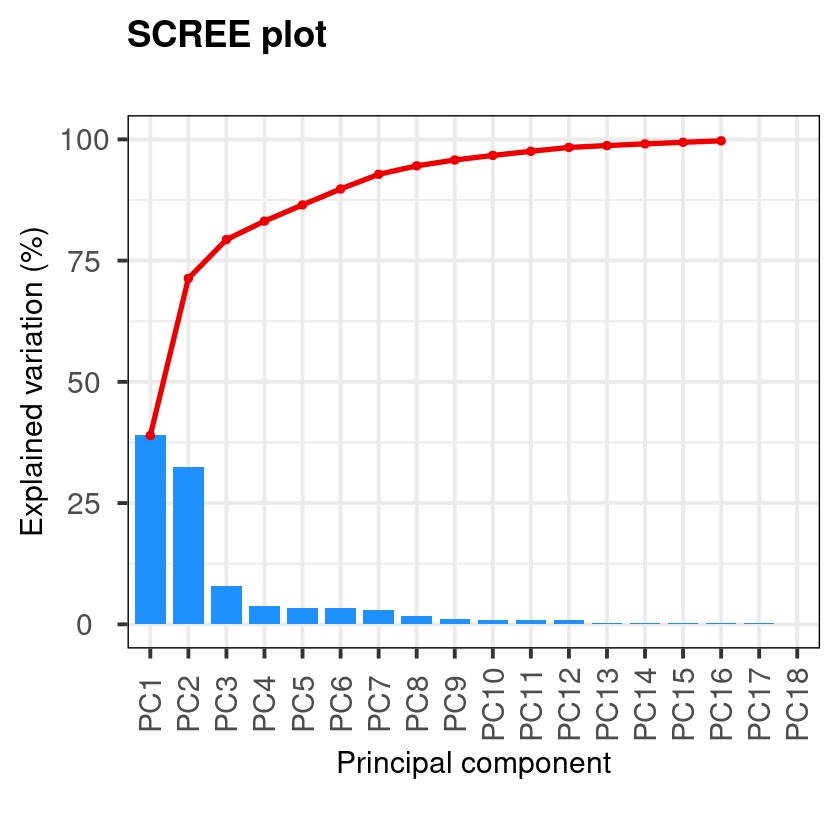

In [15]:
screeplot(p, axisLabSize = 18, titleLabSize = 22)

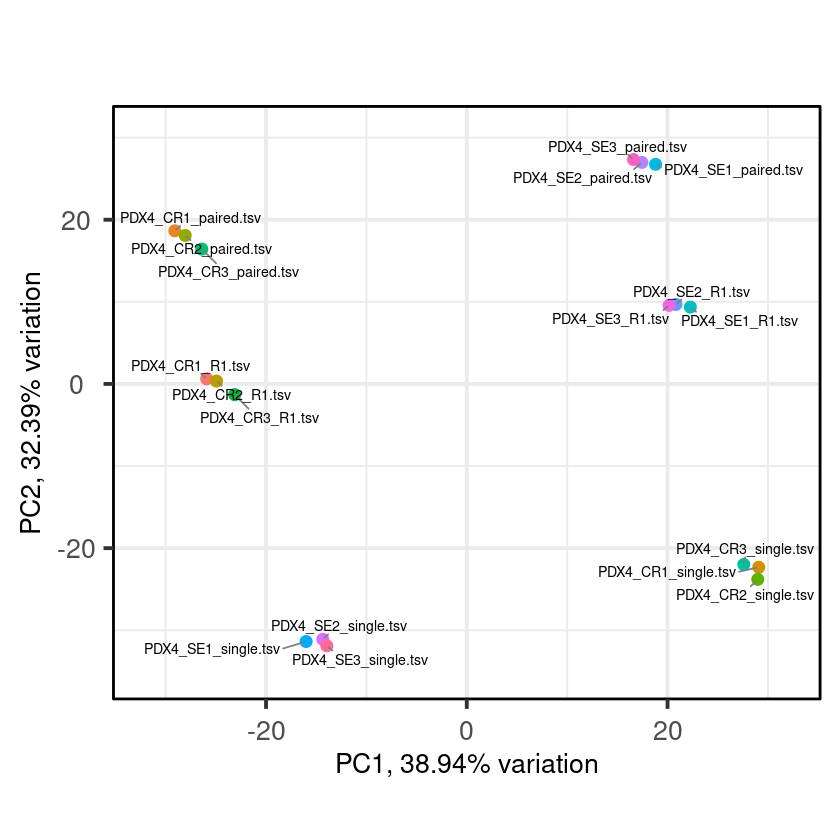

In [16]:
biplot(p)

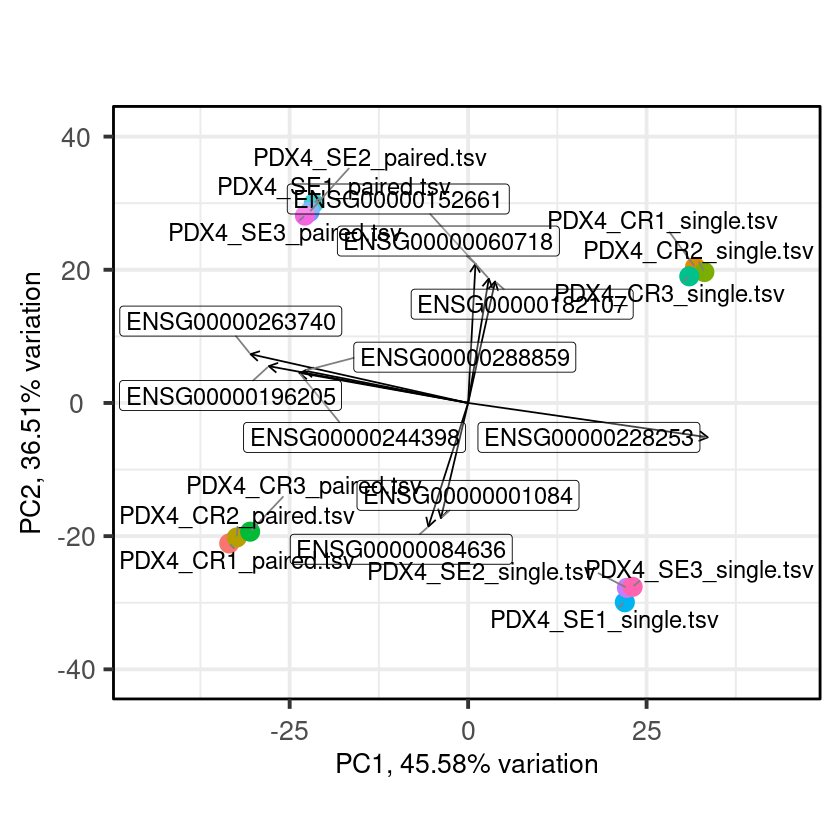

In [71]:
biplot(p, showLoadings = TRUE, labSize = 5, pointSize = 5, sizeLoadingsNames = 5)

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Coordinate system already present. Adding new coordinate system, which wi

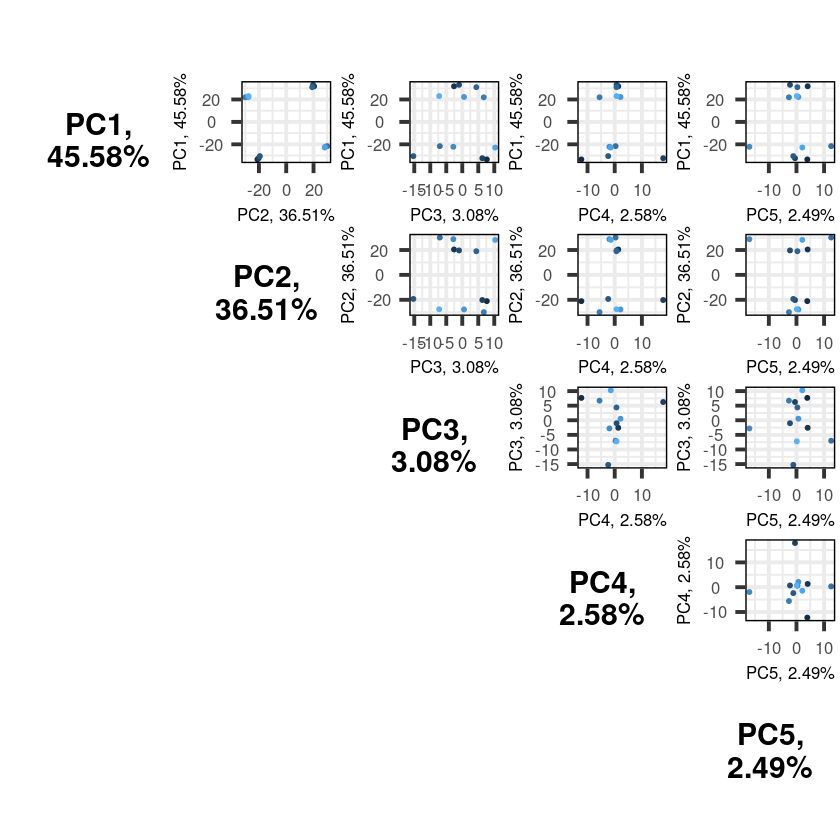

In [72]:
pairsplot(p)

-- variables retained:

ENSG00000228253, ENSG00000263740, ENSG00000196205, ENSG00000060718, ENSG00000084636, ENSG00000001084, ENSG00000182621, ENSG00000170396, ENSG00000126709, ENSG00000196747, ENSG00000289293, ENSG00000198695, ENSG00000263843, ENSG00000100288, ENSG00000215630, ENSG00000232656, ENSG00000272438, ENSG00000280213, ENSG00000250326, ENSG00000257246, ENSG00000259209, ENSG00000201098

Warning message:
“ggrepel: 95 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


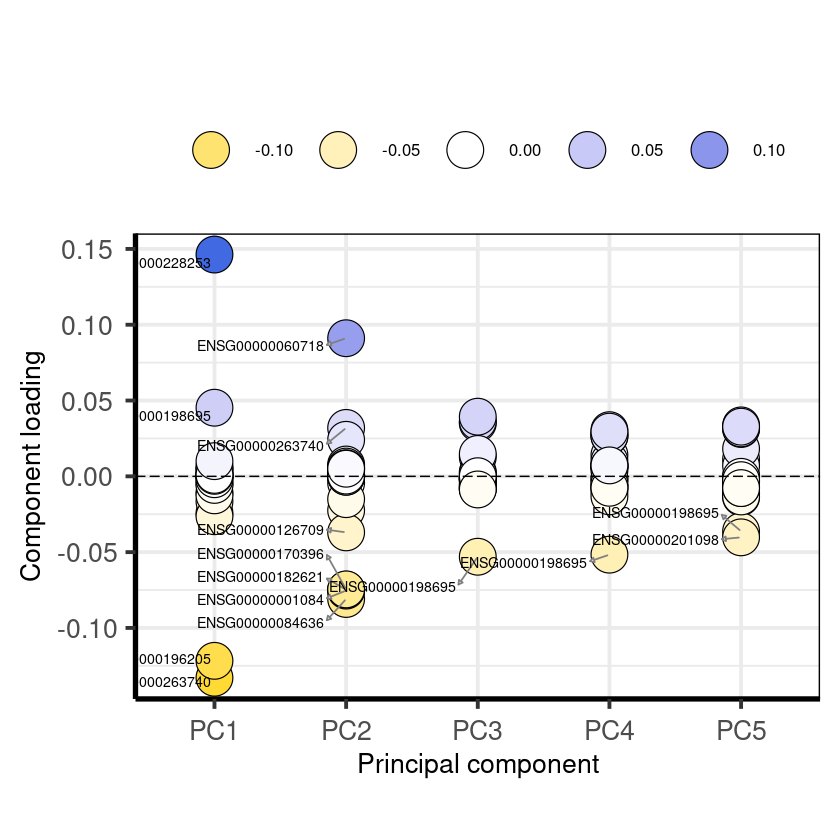

In [73]:
plotloadings(p, labSize = 3)

In [77]:
horn <- parallelPCA(vst)
horn$n
elbow <- findElbowPoint(vst$variance)
elbow

Warning message in check_numbers(x, k = k, nu = nu, nv = nv):
“more singular values/vectors requested than available”
Warning message in check_numbers(x, k = k, nu = nu, nv = nv):
“more singular values/vectors requested than available”
Warning message in check_numbers(x, k = k, nu = nu, nv = nv):
“more singular values/vectors requested than available”
Warning message in check_numbers(x, k = k, nu = nu, nv = nv):
“more singular values/vectors requested than available”
Warning message in check_numbers(x, k = k, nu = nu, nv = nv):
“more singular values/vectors requested than available”
Warning message in check_numbers(x, k = k, nu = nu, nv = nv):
“more singular values/vectors requested than available”
Warning message in check_numbers(x, k = k, nu = nu, nv = nv):
“more singular values/vectors requested than available”
Warning message in check_numbers(x, k = k, nu = nu, nv = nv):
“more singular values/vectors requested than available”
Warning message in check_numbers(x, k = k, nu = nu, nv =

[1] 2

ERROR: Error in vst$variance: $ operator is invalid for atomic vectors
